In [35]:

import os,warnings;warnings.filterwarnings("ignore")
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid',font_scale=0.8)
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import sklearn.model_selection as ms
import sklearn.neighbors as ne 
import pandas as pd

In [4]:
# Read file
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [5]:
# Top 5 rows show survey data
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
# Bottom 5 rows show synthetic data
df.tail(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
# Additional rows showing synthetic data
df.iloc[[501,518,516]]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
501,Female,21.853826,1.755643,137.796884,yes,yes,3.000000,3.00000,Sometimes,no,2.184707,no,1.978631,0.838957,Sometimes,Public_Transportation,Obesity_Type_III
518,Female,23.501249,1.600000,45.000000,no,no,2.591439,3.00000,Frequently,no,2.074048,no,1.679935,0.000000,no,Public_Transportation,Insufficient_Weight
516,Female,21.491055,1.586952,43.087508,no,no,2.008760,1.73762,Frequently,no,1.792022,no,0.119643,0.000000,no,Public_Transportation,Insufficient_Weight


In [8]:
# Height and weight are highly correlated and they directly correlate to the BMI calc used for the target
# Remove Height and Weight
df = df.drop(columns=['Height', 'Weight'])
print(df.shape)

(2111, 15)


In [9]:
# no nulls 
df[df.isnull().any(axis=1)]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [11]:
# Convert object/text variables to category variables
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [12]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:    
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [14]:
#Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')  
    
# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [15]:
# confirm types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   int64   
 5   NCP                             2111 non-null   int64   
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   int64   
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   int64   
 11  TUE                             2111 non-null   int64   
 12  CALC                

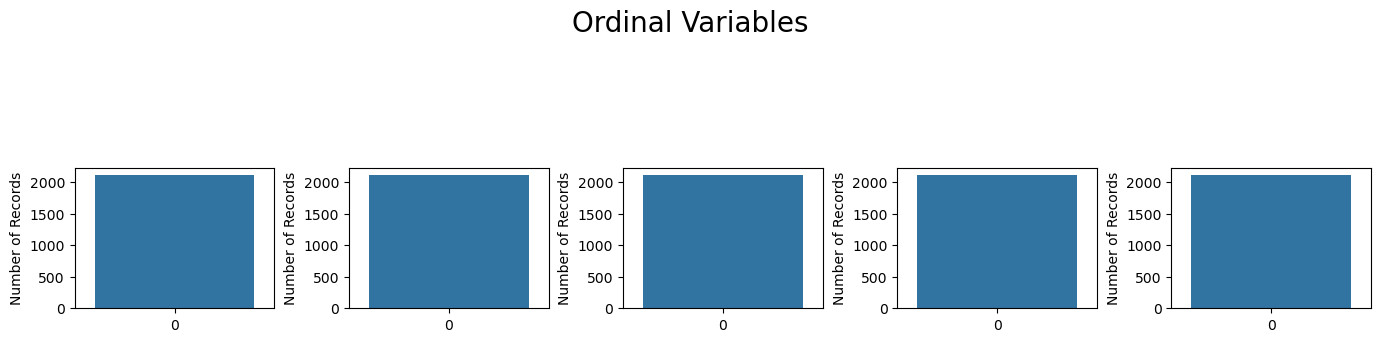

In [16]:
# columns of interest
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    subplot.yaxis.label.set_text("Number of Records")

# show figure & plots
fig.suptitle("Ordinal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
plt.show()

In [51]:
#DT

# Importing necessary libraries
import pandas as pd
from sklearn import tree
import sklearn.tree as tr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Data Preparation
# Assuming all columns are relevant, so no need to drop any columns
# Split data into features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Encode categorical variables (if any)
X_encoded = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Decis1ion Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_train = dt_classifier.predict(X_train)
y_pred_test = dt_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Training Accuracy: 1.0
Testing Accuracy: 0.9361702127659575

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.96      0.94        56
      Normal_Weight       0.88      0.85      0.87        62
     Obesity_Type_I       0.95      0.94      0.94        78
    Obesity_Type_II       0.93      0.95      0.94        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.89      0.91      0.90        56
Overweight_Level_II       0.98      0.94      0.96        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423


Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 5 53  0  0  0  4  0]
 [ 0  0 73  4  0  0  1]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 51  0]
 [ 0  0  1  0  0  2 47]]


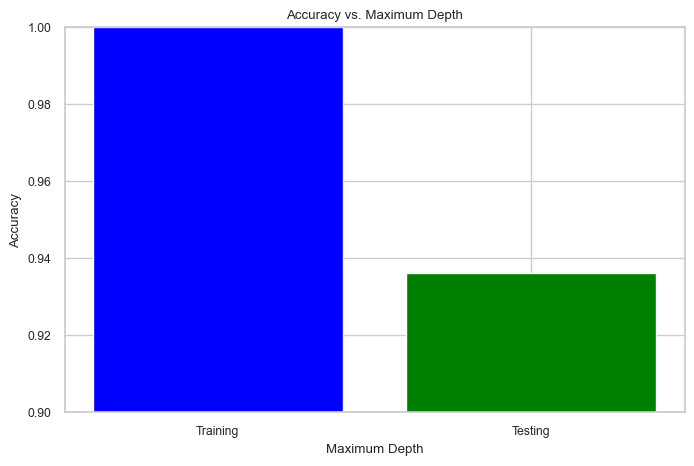

In [50]:
import matplotlib.pyplot as plt

# Provided accuracy values
accuracy_values = [1.0, 0.9361702127659575]
max_depths = ['Training', 'Testing']

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(max_depths, accuracy_values, color=['blue', 'green'])
plt.title('Accuracy vs. Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Set y-axis limit for better visualization
plt.show()



In [26]:
#KNN

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Convert pandas DataFrames to numpy arrays
X_train_np = X_train.values
X_test_np = X_test.values

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (default is 5)
knn_classifier.fit(X_train_np, y_train)

# Make predictions
y_pred_train = knn_classifier.predict(X_train_np)
y_pred_test = knn_classifier.predict(X_test_np)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Training Accuracy: 0.9241706161137441
Testing Accuracy: 0.9125295508274232

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.98      0.92        56
      Normal_Weight       0.93      0.60      0.73        62
     Obesity_Type_I       0.90      0.96      0.93        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.84      0.95      0.89        56
Overweight_Level_II       0.92      0.92      0.92        50

           accuracy                           0.91       423
          macro avg       0.91      0.91      0.91       423
       weighted avg       0.92      0.91      0.91       423


Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 9 37  3  0  0 10  3]
 [ 0  0 75  2  1  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 53  1]
 [ 0  0  4  0  0  0 46]]


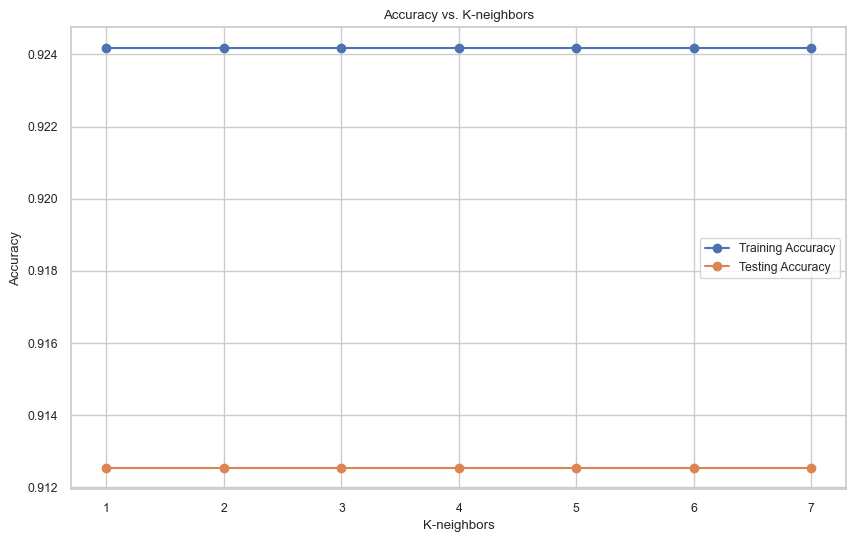

In [48]:
#KNN Plot

import matplotlib.pyplot as plt

# Provided accuracy values
k_neighbors = list(range(1, 8))  # Assuming 7 different k values
train_accuracy = [0.9241706161137441, 0.9241706161137441, 0.9241706161137441, 0.9241706161137441, 0.9241706161137441, 0.9241706161137441, 0.9241706161137441]
test_accuracy = [0.9125295508274232, 0.9125295508274232, 0.9125295508274232, 0.9125295508274232, 0.9125295508274232, 0.9125295508274232, 0.9125295508274232]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_neighbors, train_accuracy, marker='o', label='Training Accuracy')
plt.plot(k_neighbors, test_accuracy, marker='o', label='Testing Accuracy')
plt.title('Accuracy vs. K-neighbors')
plt.xlabel('K-neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_neighbors)
plt.legend()
plt.grid(True)
plt.show()


In [53]:
#SVM

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Data Preparation
# Assuming all columns are relevant, so no need to drop any columns
# Split data into features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Encode categorical variables (if any)
X_encoded = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_train = svm_classifier.predict(X_train)
y_pred_test = svm_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Training Accuracy: 0.9046208530805687
Testing Accuracy: 0.8912529550827423

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      1.00      0.92        56
      Normal_Weight       0.89      0.68      0.77        62
     Obesity_Type_I       0.91      0.94      0.92        78
    Obesity_Type_II       0.94      1.00      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.77      0.84      0.80        56
Overweight_Level_II       0.86      0.76      0.81        50

           accuracy                           0.89       423
          macro avg       0.89      0.89      0.88       423
       weighted avg       0.89      0.89      0.89       423


Confusion Matrix:
[[56  0  0  0  0  0  0]
 [10 42  0  0  0  9  1]
 [ 0  0 73  4  0  0  1]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 47  4]
 [ 0  0  7  0  0  5 38]]


[0.6030805687203792, 0.9046208530805687, 0.06575829383886256, 0.6007109004739336]
[0.5839243498817966, 0.8912529550827423, 0.05200945626477541, 0.5650118203309693]


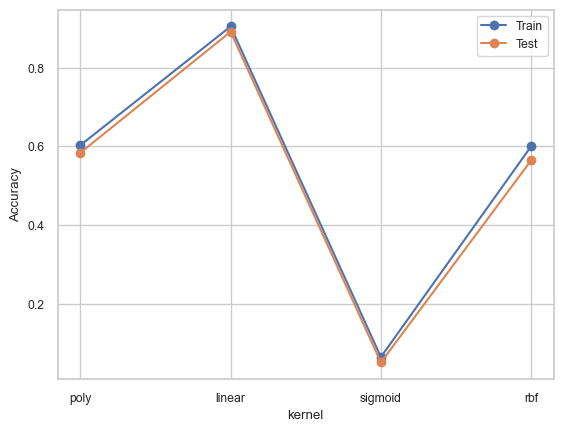

In [52]:
#Plot SVM
# SVM classification with different kernels
Acc_tr=[]
Acc_tes=[]
kernel=[]

for i in ['poly', 'linear', 'sigmoid', 'rbf']:
    clsfi=sv.SVC(kernel=i, degree=2)
    clsfi.fit(X_train,y_train)
    Acc_tr.append(clsfi.score(X_train,y_train))
    Acc_tes.append(clsfi.score(X_test,y_test))
    kernel.append(i)
print(Acc_tr)
print(Acc_tes)    

plt.figure()
plt.plot(Acc_tr,label='Train', marker='o')
plt.plot(Acc_tes,label='Test', marker='o')
plt.xticks([0, 1, 2, 3], kernel)
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

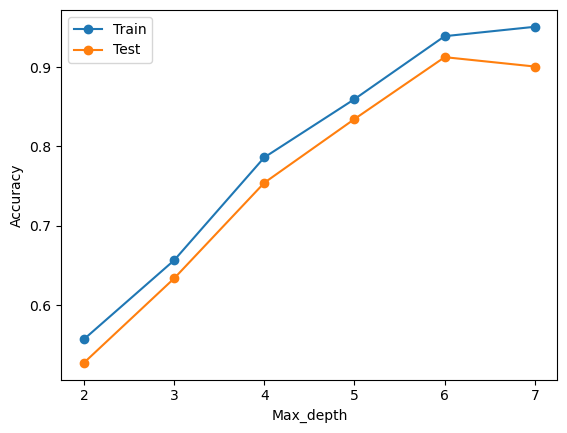

In [31]:
#DT Plot

trACC=[]
tesACC=[]
MD=[]

for i in range(2,8):
    #Create a Decision Tree classifier with the current max_depth
    DT=tr.DecisionTreeClassifier(max_depth=i)
    DT.fit(X_train,y_train)
    trACC.append(DT.score(X_train,y_train))
    tesACC.append(DT.score(X_test,y_test))
    MD.append(i)
#print(trACC)
#print(tesACC)
#print(MD)
plt.figure()
plt.plot(MD, trACC, label='Train',marker='o')
plt.plot(MD, tesACC, label='Test', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[0.5515402843601895, 0.6030805687203792, 0.5995260663507109, 0.6338862559241706, 0.6492890995260664, 0.6427725118483413, 0.6451421800947867, 0.6332938388625592, 0.6220379146919431, 0.6190758293838863]
[0.5295508274231678, 0.5839243498817966, 0.5791962174940898, 0.6122931442080378, 0.6477541371158393, 0.6524822695035462, 0.6501182033096927, 0.6453900709219859, 0.6501182033096927, 0.6264775413711584]


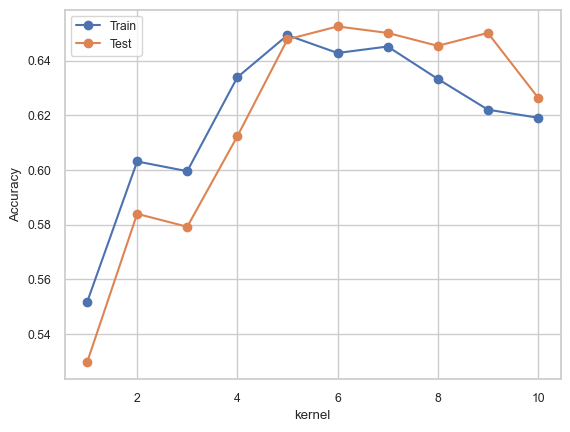

In [42]:
# SVM classification using polynomial kernel with different degrees
Acc_tr=[]
Acc_tes=[]
Degree=[]

for i in range(1,11):
    clsfi=sv.SVC(kernel='poly', degree=i)
    clsfi.fit(X_train,y_train)
    Acc_tr.append(clsfi.score(X_train,y_train))
    Acc_tes.append(clsfi.score(X_test,y_test))
    Degree.append(i)
print(Acc_tr)
print(Acc_tes)    

plt.figure()
plt.plot(Degree,Acc_tr,label='Train', marker='o')
plt.plot(Degree, Acc_tes,label='Test', marker='o')
#plt.xticks([0, 1, 2, 3], kernel)
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
# Pre Processing

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])
df['Age']=lb.fit_transform(df['Age'])
df['Height']=lb.fit_transform(df['Height'])
df['Weight']=lb.fit_transform(df['Weight'])
df['family_history_with_overweight']=lb.fit_transform(df['family_history_with_overweight'])
df['FAVC']=lb.fit_transform(df['FAVC'])
df['FCVC']=lb.fit_transform(df['FCVC'])
df['NCP']=lb.fit_transform(df['NCP'])
df['CAEC']=lb.fit_transform(df['CAEC'])
df['SMOKE']=lb.fit_transform(df['SMOKE'])

In [54]:
#NB

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Data Preparation
# Assuming all columns are relevant, so no need to drop any columns
# Split data into features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Encode categorical variables (if any)
X_encoded = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_train = nb_classifier.predict(X_train)
y_pred_test = nb_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Training Accuracy: 0.542654028436019
Testing Accuracy: 0.5295508274231678

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.45      0.75      0.56        56
      Normal_Weight       0.57      0.13      0.21        62
     Obesity_Type_I       0.36      0.41      0.38        78
    Obesity_Type_II       0.50      0.97      0.66        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.44      0.14      0.22        56
Overweight_Level_II       0.45      0.30      0.36        50

           accuracy                           0.53       423
          macro avg       0.54      0.53      0.48       423
       weighted avg       0.54      0.53      0.49       423


Confusion Matrix:
[[42  0 13  0  0  1  0]
 [35  8  6  0  0  7  6]
 [ 0  2 32 37  0  2  5]
 [ 0  0  0 56  0  0  2]
 [ 0  0  0  0 63  0  0]
 [15  2 20  6  0  8  5]
 [ 2  2 18 13  0  0 15]]


Summary Statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000

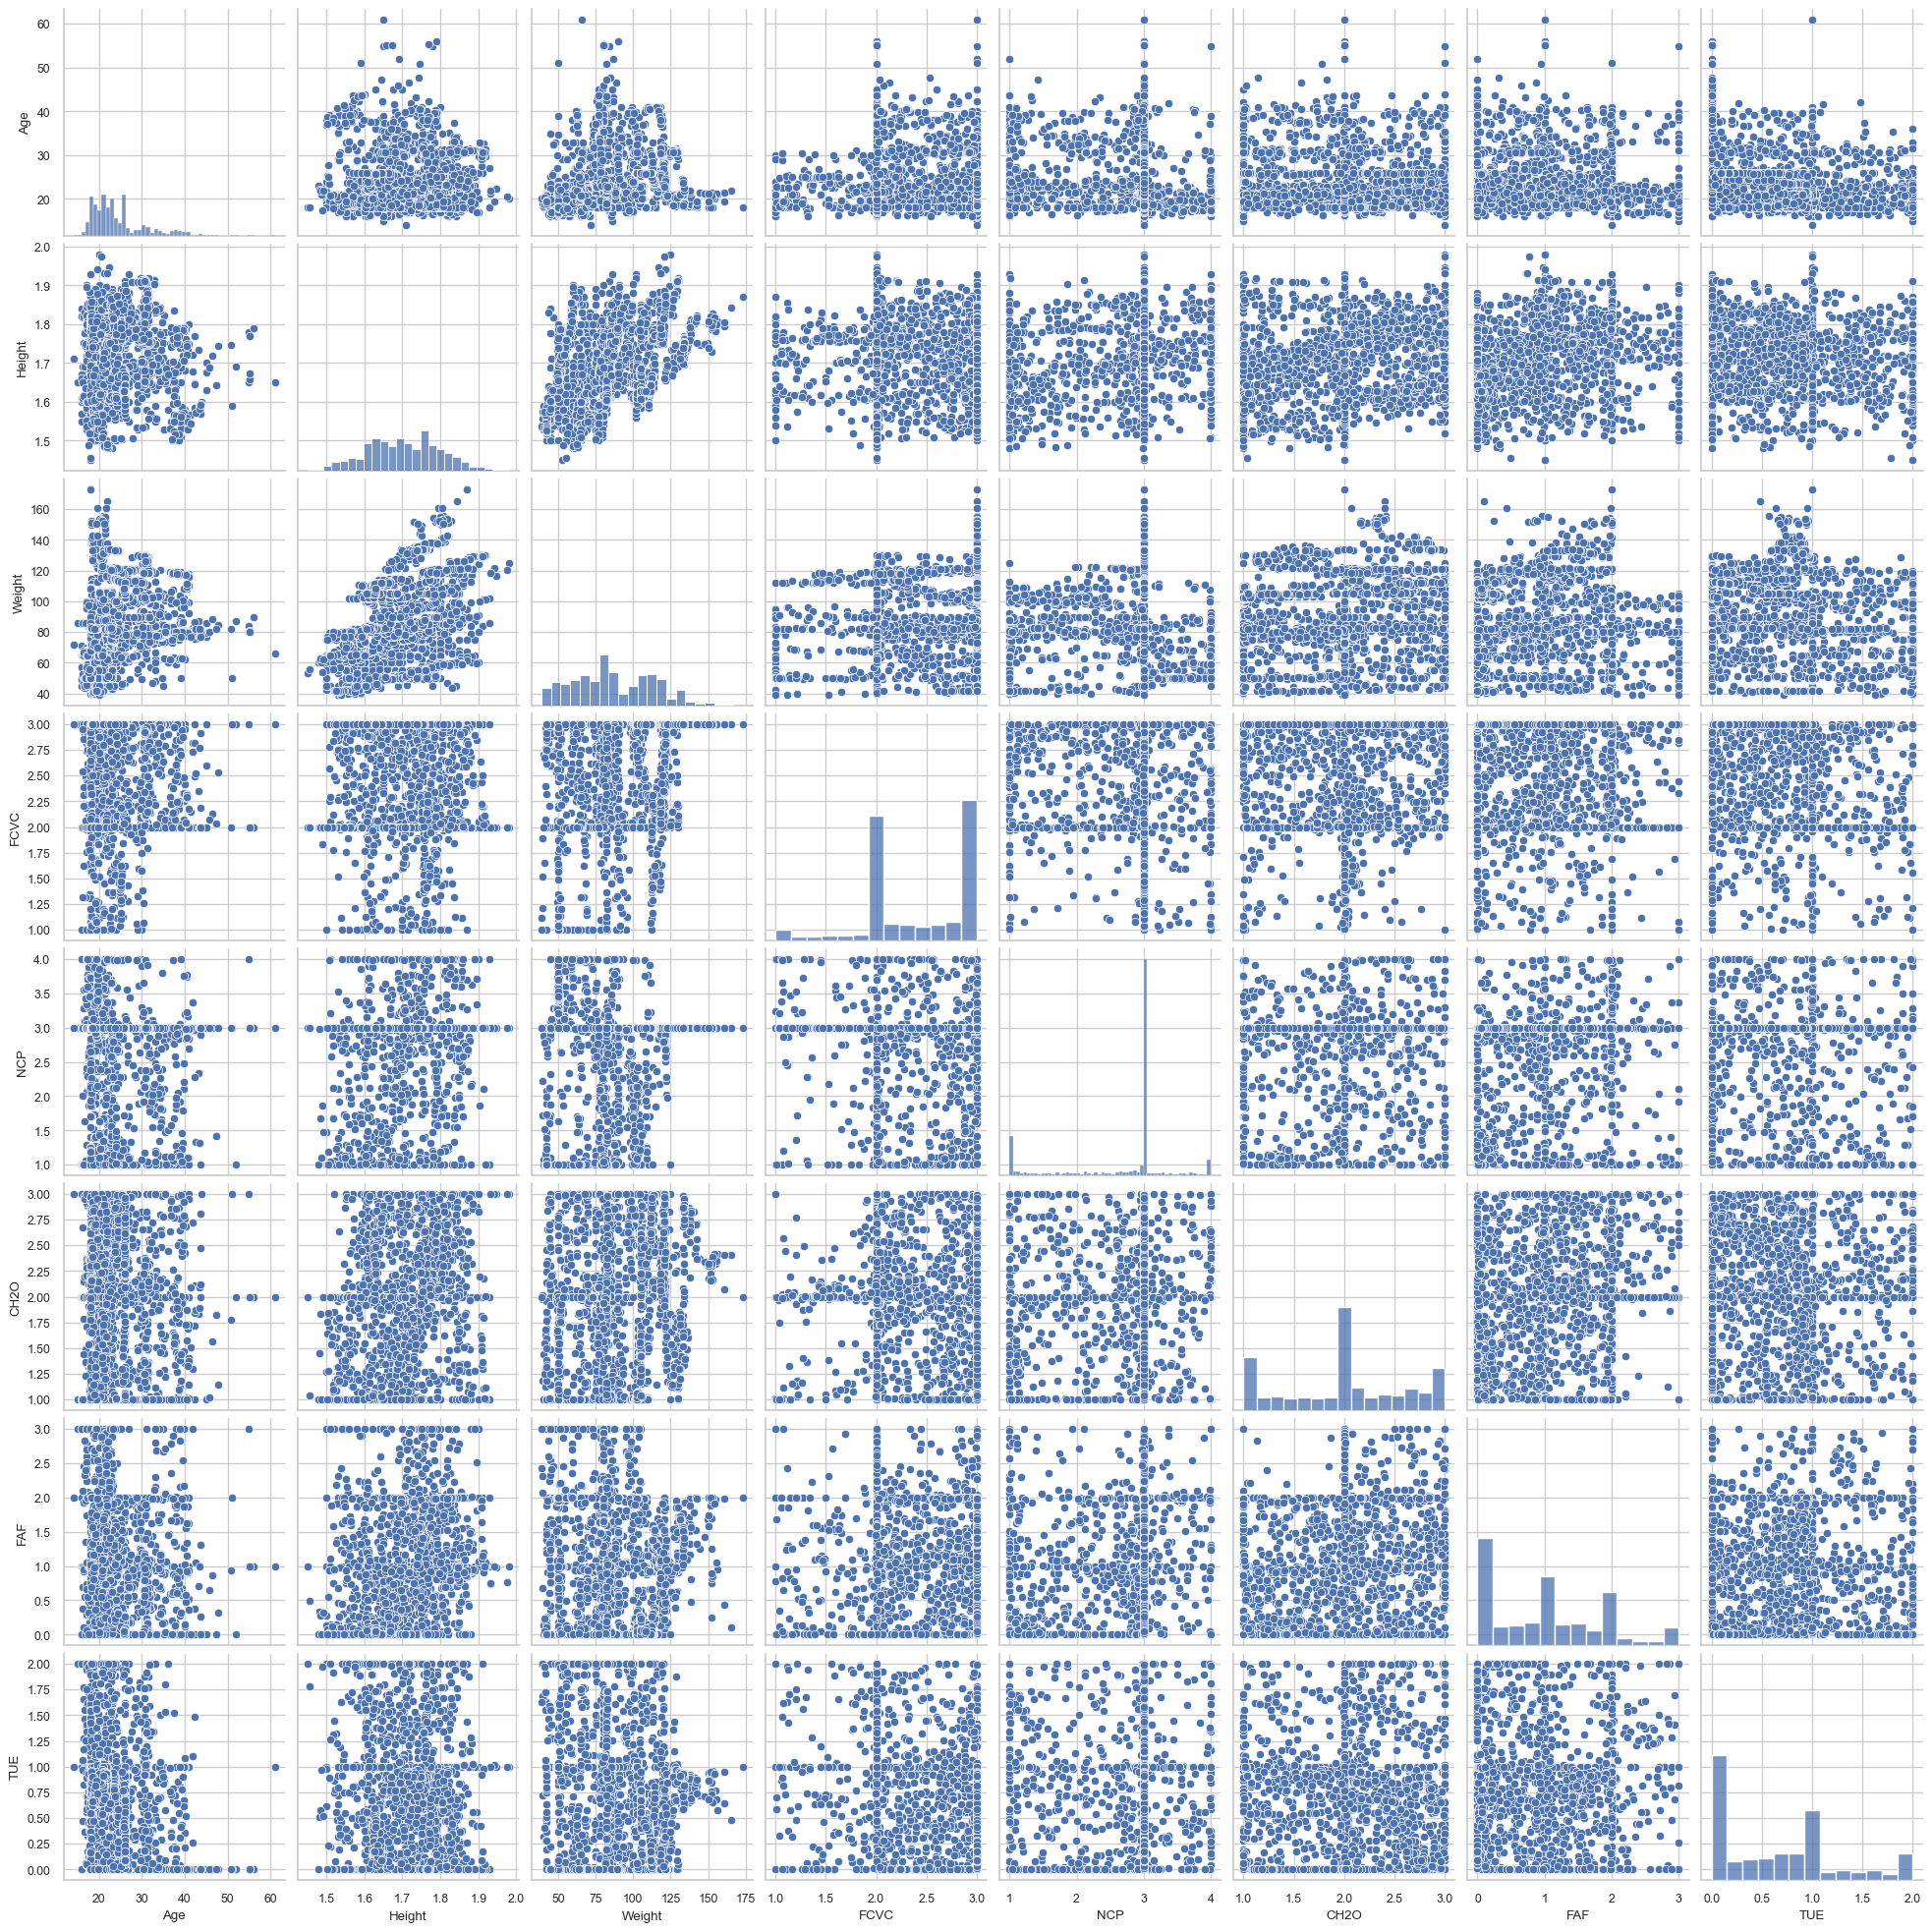

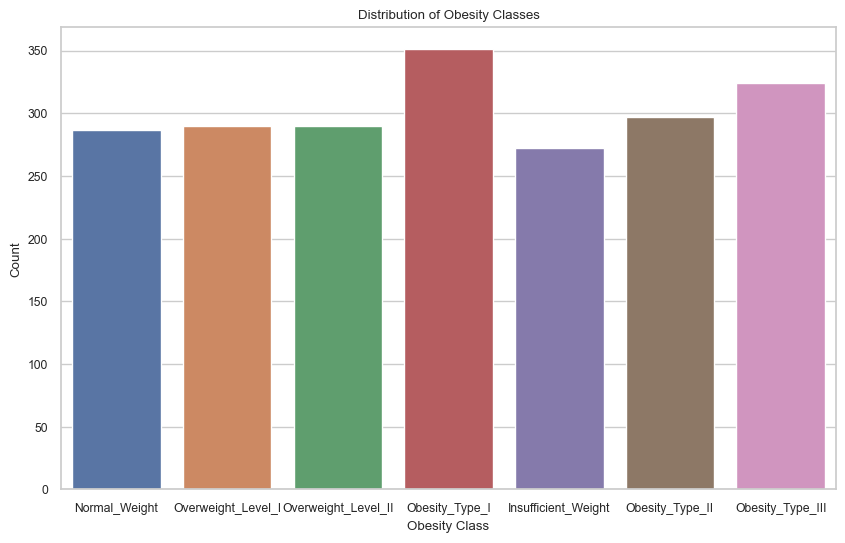

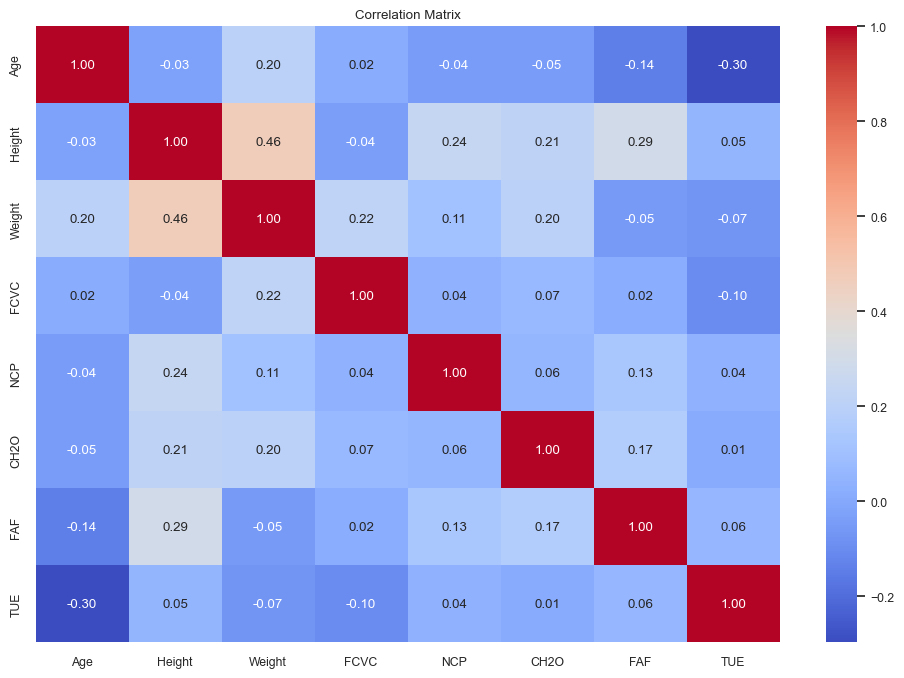

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Display summary statistics
print("Summary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize distributions of numerical variables
sns.pairplot(df)
plt.show()

# Visualize distributions of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribution of Obesity Classes')
plt.xlabel('Obesity Class')
plt.ylabel('Count')
plt.show()

# Explore correlations between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()